# 🎮 PHÂN TÍCH DỮ LIỆU VIDEO GAME SALES

## Phần 1: Giới thiệu & Khảo sát dữ liệu
### 1.1 Tổng quan về CSDL

In [28]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Đọc dữ liệu
df = pd.read_csv("vgsales.csv", sep=";")

# Hiển thị thông tin tổng quan
print("=== THÔNG TIN TỔNG QUAN ===")
print(f"Số lượng records: {len(df)}")
print(f"Số lượng thuộc tính: {len(df.columns)}")
print("\nThông tin chi tiết:")
df.info()   

=== THÔNG TIN TỔNG QUAN ===
Số lượng records: 16598
Số lượng thuộc tính: 12

Thông tin chi tiết:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rank               16598 non-null  int64  
 1   Name               16598 non-null  object 
 2   Platform           16572 non-null  object 
 3   Year               16301 non-null  float64
 4   Genre              16572 non-null  object 
 5   Publisher          16514 non-null  object 
 6   NA_Sales           16572 non-null  float64
 7   EU_Sales           16572 non-null  float64
 8   JP_Sales           16572 non-null  float64
 9   Other_Sales        16572 non-null  float64
 10  Global_Sales       16572 non-null  float64
 11  High_Global_Sales  16572 non-null  object 
dtypes: float64(6), int64(1), object(5)
memory usage: 1.5+ MB


### 1.2 Giới thiệu từng thuộc tính

In [29]:
# Phân tích chi tiết từng thuộc tính
print("\n=== PHÂN TÍCH CHI TIẾT TỪNG THUỘC TÍNH ===")
for column in df.columns:
    print(f"\nThuộc tính: {column}")
    print(f"Kiểu dữ liệu: {df[column].dtype}")
    print(f"Số giá trị unique: {df[column].nunique()}")
    print(f"Số giá trị null: {df[column].isnull().sum()}")
    
    if df[column].dtype in ['int64', 'float64']:
        print("\nThống kê mô tả:")
        desc = df[column].describe()
        print(desc)
        print(f"Mode: {df[column].mode().iloc[0]}")
        print(f"Midrange: {(df[column].max() + df[column].min()) / 2}")
    else:
        print("\nPhân phối giá trị:")
        value_counts = df[column].value_counts().head()
        print(value_counts)
        print("\nTỷ lệ phần trăm:")
        print((value_counts / len(df) * 100).round(2))


=== PHÂN TÍCH CHI TIẾT TỪNG THUỘC TÍNH ===

Thuộc tính: Rank
Kiểu dữ liệu: int64
Số giá trị unique: 16598
Số giá trị null: 0

Thống kê mô tả:
count    16598.000000
mean      8300.605254
std       4791.853933
min          1.000000
25%       4151.250000
50%       8300.500000
75%      12449.750000
max      16600.000000
Name: Rank, dtype: float64
Mode: 1
Midrange: 8300.5

Thuộc tính: Name
Kiểu dữ liệu: object
Số giá trị unique: 11487
Số giá trị null: 0

Phân phối giá trị:
Name
Need for Speed: Most Wanted    12
Steins                         12
Madden NFL 07                   9
LEGO Marvel Super Heroes        9
FIFA 14                         9
Name: count, dtype: int64

Tỷ lệ phần trăm:
Name
Need for Speed: Most Wanted    0.07
Steins                         0.07
Madden NFL 07                  0.05
LEGO Marvel Super Heroes       0.05
FIFA 14                        0.05
Name: count, dtype: float64

Thuộc tính: Platform
Kiểu dữ liệu: object
Số giá trị unique: 31
Số giá trị null: 26

Phân phố

### 1.3 Tiền xử lý dữ liệu

In [30]:
# Xử lý missing values
df['Year'] = df['Year'].astype(float)
df['High_Global_Sales'] = df['High_Global_Sales'].astype(str)
df.ffill(inplace=True)

print("Kiểm tra dữ liệu sau khi xử lý:")
print(df.isnull().sum())

Kiểm tra dữ liệu sau khi xử lý:
Rank                 0
Name                 0
Platform             0
Year                 0
Genre                0
Publisher            0
NA_Sales             0
EU_Sales             0
JP_Sales             0
Other_Sales          0
Global_Sales         0
High_Global_Sales    0
dtype: int64


## Phần 2: Phân tích - Thống kê thủ công
### 2.1 Tìm hiểu dữ liệu
#### 2.1.1 Phân tích các thuộc tính số

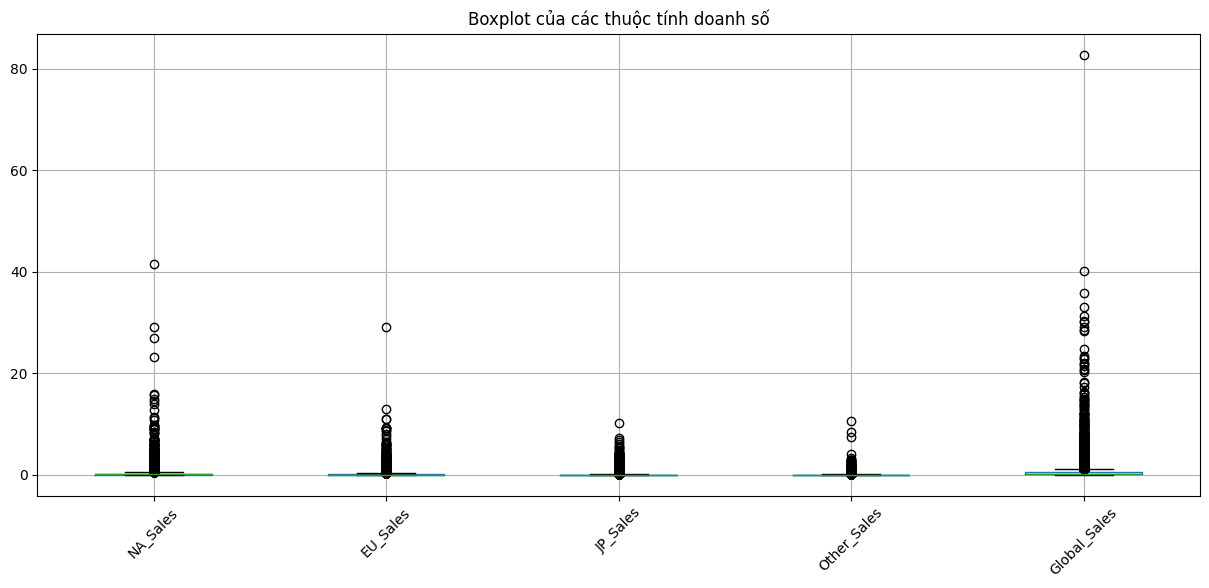

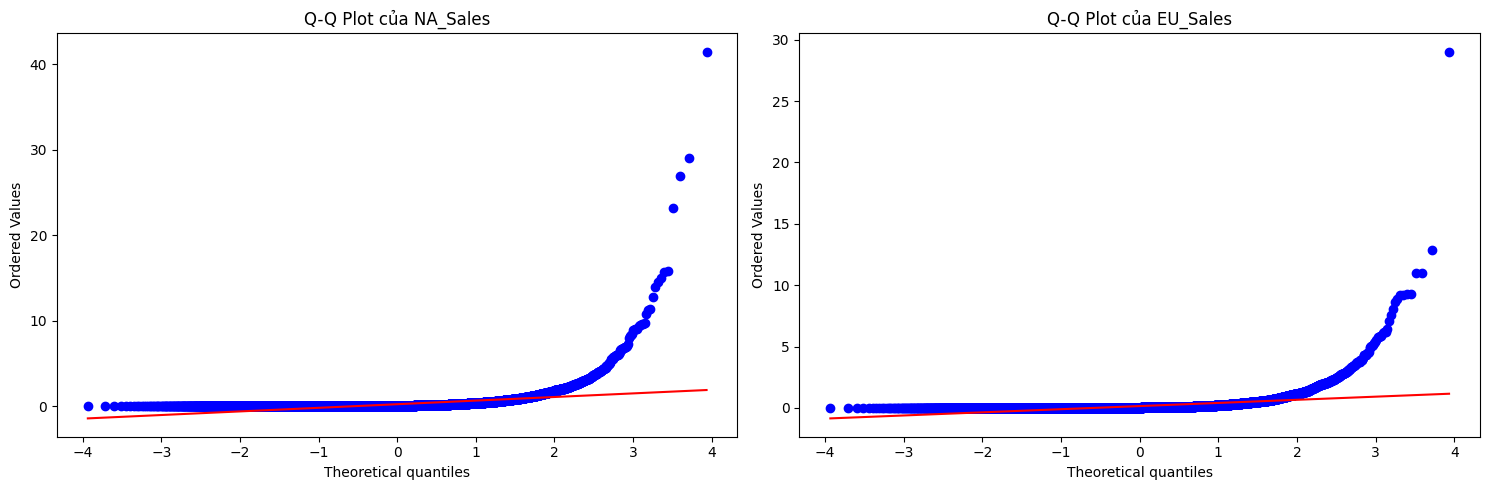

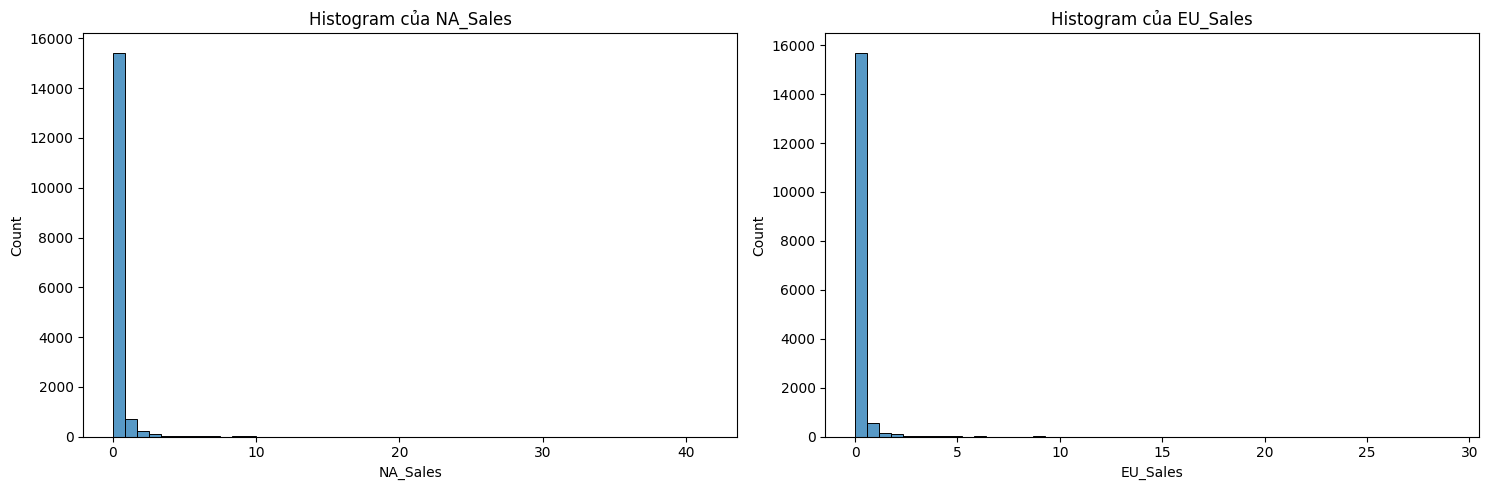

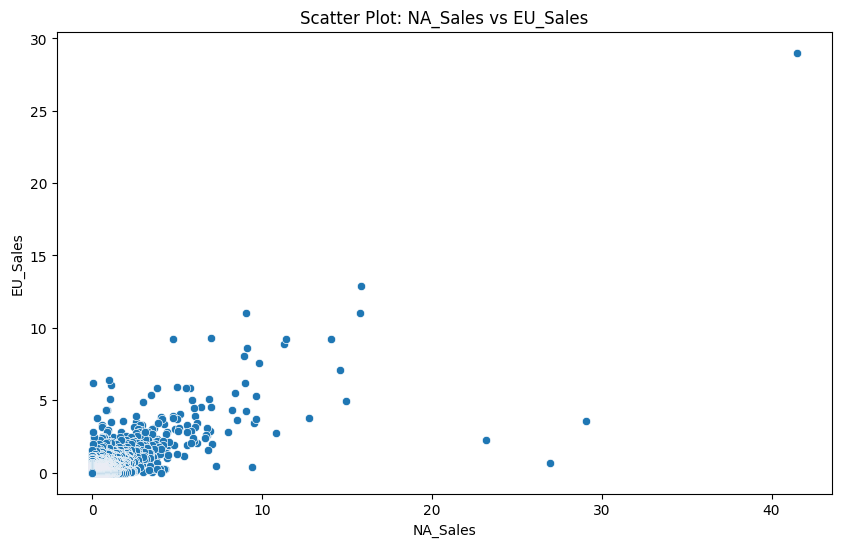

In [31]:
# Boxplot cho thuộc tính số
plt.figure(figsize=(15, 6))
sales_cols = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
df[sales_cols].boxplot()
plt.title('Boxplot của các thuộc tính doanh số')
plt.xticks(rotation=45)
plt.show()

# Q-Q Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
stats.probplot(df['NA_Sales'], dist="norm", plot=ax1)
ax1.set_title('Q-Q Plot của NA_Sales')
stats.probplot(df['EU_Sales'], dist="norm", plot=ax2)
ax2.set_title('Q-Q Plot của EU_Sales')
plt.tight_layout()
plt.show()

# Histogram
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='NA_Sales', bins=50)
plt.title('Histogram của NA_Sales')
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='EU_Sales', bins=50)
plt.title('Histogram của EU_Sales')
plt.tight_layout()
plt.show()

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='NA_Sales', y='EU_Sales')
plt.title('Scatter Plot: NA_Sales vs EU_Sales')
plt.show()

#### 2.1.2 Phân tích theo nhóm Genre

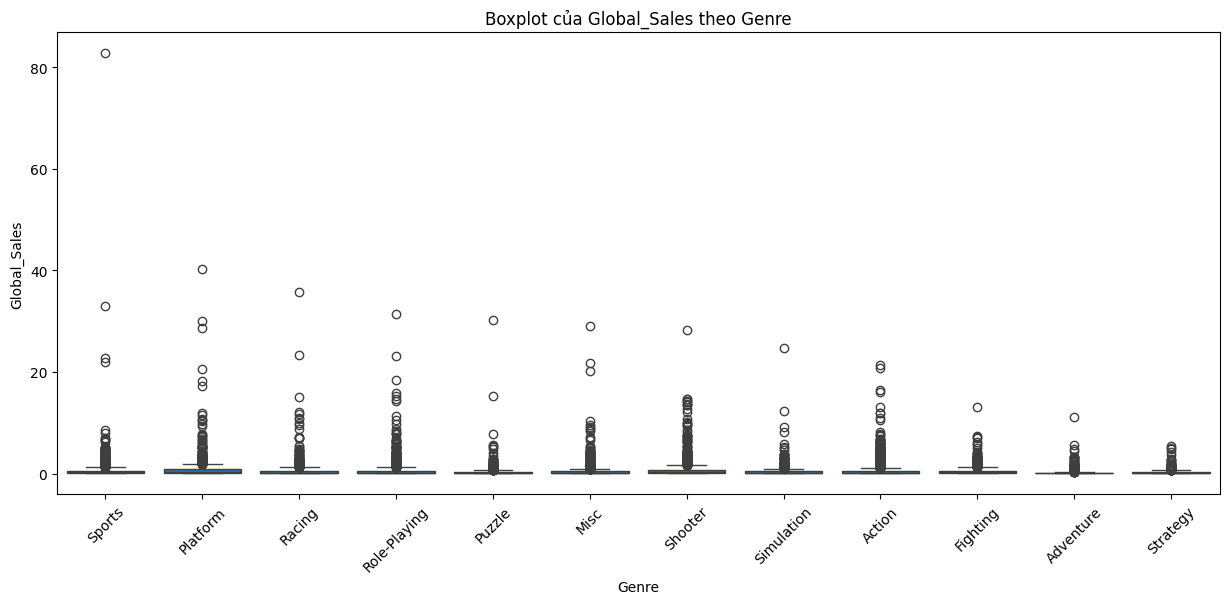

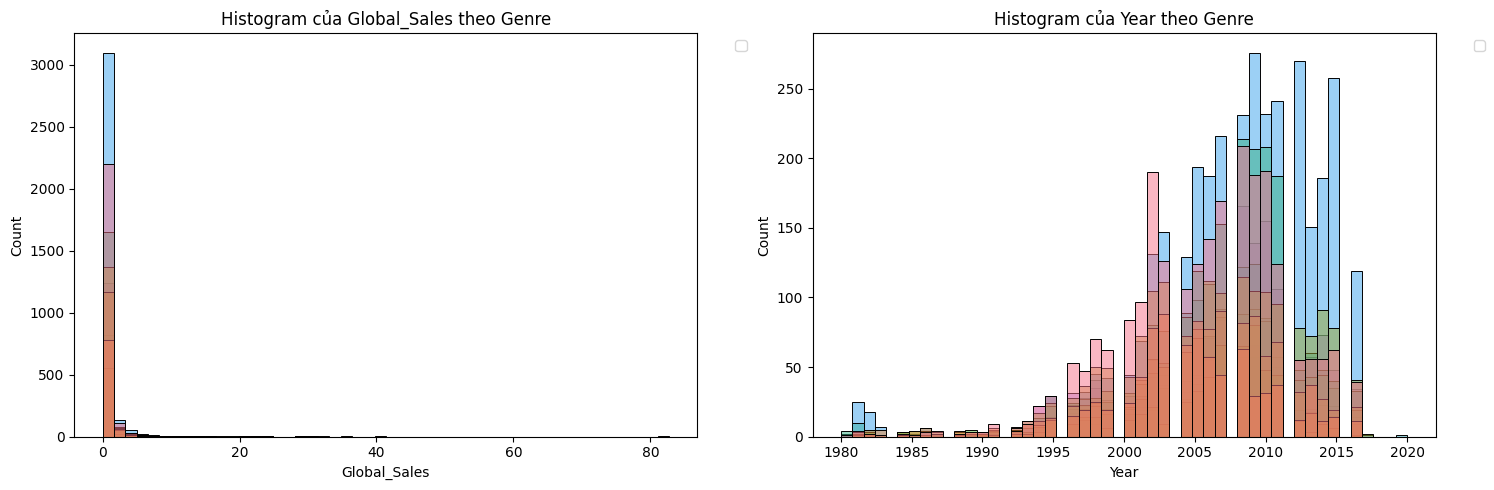

In [32]:
# Boxplot theo Genre
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x='Genre', y='Global_Sales')
plt.xticks(rotation=45)
plt.title('Boxplot của Global_Sales theo Genre')
plt.show()

# Histogram theo Genre
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Global_Sales', hue='Genre', bins=50)
plt.title('Histogram của Global_Sales theo Genre')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Year', hue='Genre', bins=50)
plt.title('Histogram của Year theo Genre')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### 2.1.3 Đo lường tương đồng và khác biệt

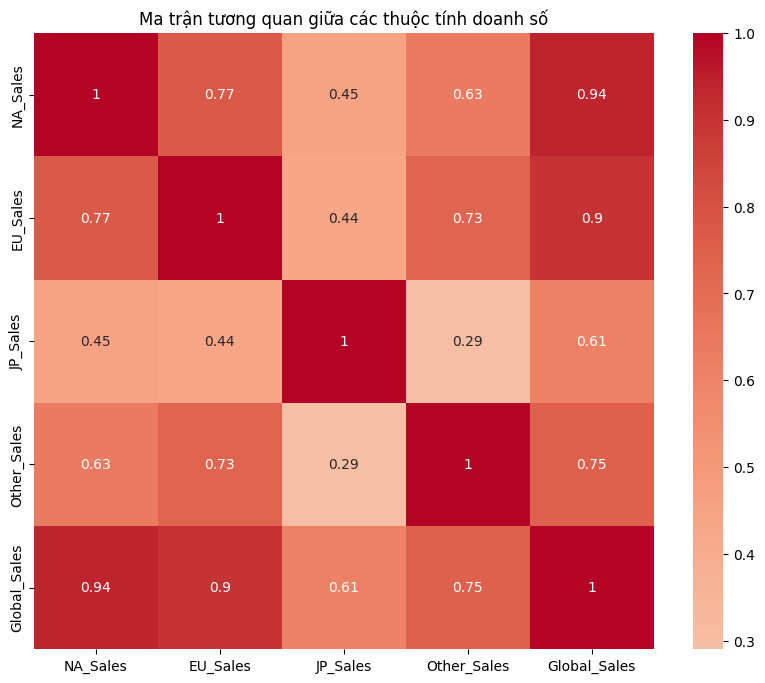


Cosine Similarity giữa các thuộc tính:
1. Genre:
[[1. 0. 1. 1.]
 [0. 0. 0. 0.]
 [1. 0. 1. 1.]
 [1. 0. 1. 1.]]

2. High_Global_Sales:
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]

3. NA_Sales & EU_Sales:
[[1.         0.88333728 0.99740667 0.99999996]
 [0.88333728 1.         0.84731063 0.88346255]
 [0.99740667 0.84731063 1.         0.9973874 ]
 [0.99999996 0.88346255 0.9973874  1.        ]]

4. Rank:
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [33]:
# Ma trận tương quan
plt.figure(figsize=(10, 8))
correlation_matrix = df[sales_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Ma trận tương quan giữa các thuộc tính doanh số')
plt.show()

# Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity

# Chọn 4 thuộc tính theo yêu cầu
nominal_attr = 'Genre'  # Thuộc tính danh nghĩa
binary_attr = 'High_Global_Sales'  # Thuộc tính nhị phân
numeric_attr = ['NA_Sales', 'EU_Sales']  # Thuộc tính số
ordinal_attr = 'Rank'  # Thuộc tính thứ tự

# Chọn 4 dòng đầu tiên
sample_data = df.head(4)

# Chuyển đổi dữ liệu
le = LabelEncoder()
nominal_encoded = le.fit_transform(sample_data[nominal_attr]).reshape(-1, 1)
binary_encoded = sample_data[binary_attr].map({'True': 1, 'False': 0}).to_numpy().reshape(-1, 1)
numeric_data = sample_data[numeric_attr].values
ordinal_data = sample_data[ordinal_attr].values.reshape(-1, 1)

print("\nCosine Similarity giữa các thuộc tính:")
print("1. Genre:")
print(cosine_similarity(nominal_encoded))
print("\n2. High_Global_Sales:")
print(cosine_similarity(binary_encoded))
print("\n3. NA_Sales & EU_Sales:")
print(cosine_similarity(numeric_data))
print("\n4. Rank:")
print(cosine_similarity(ordinal_data))

## Phần 3: Khai thác dữ liệu
### 3.1 Phân lớp (Classification)

In [34]:
# Chuẩn bị dữ liệu cho phân lớp
X = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
y = df['Genre']

# Chia tập train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))

# Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
gb_pred = gb_model.predict(X_test)

print("\nGradient Boosting Classification Report:")
print(classification_report(y_test, gb_pred))

Random Forest Classification Report:
              precision    recall  f1-score   support

      Action       0.24      0.36      0.28       664
   Adventure       0.28      0.40      0.33       259
    Fighting       0.10      0.05      0.07       168
        Misc       0.16      0.15      0.16       330
    Platform       0.18      0.10      0.13       186
      Puzzle       0.12      0.04      0.06       108
      Racing       0.16      0.13      0.14       260
Role-Playing       0.28      0.27      0.27       283
     Shooter       0.23      0.16      0.19       263
  Simulation       0.06      0.04      0.05       171
      Sports       0.24      0.29      0.26       481
    Strategy       0.14      0.05      0.08       147

    accuracy                           0.22      3320
   macro avg       0.18      0.17      0.17      3320
weighted avg       0.20      0.22      0.20      3320


Gradient Boosting Classification Report:
              precision    recall  f1-score   support


### 3.2 Phân cụm (Clustering)

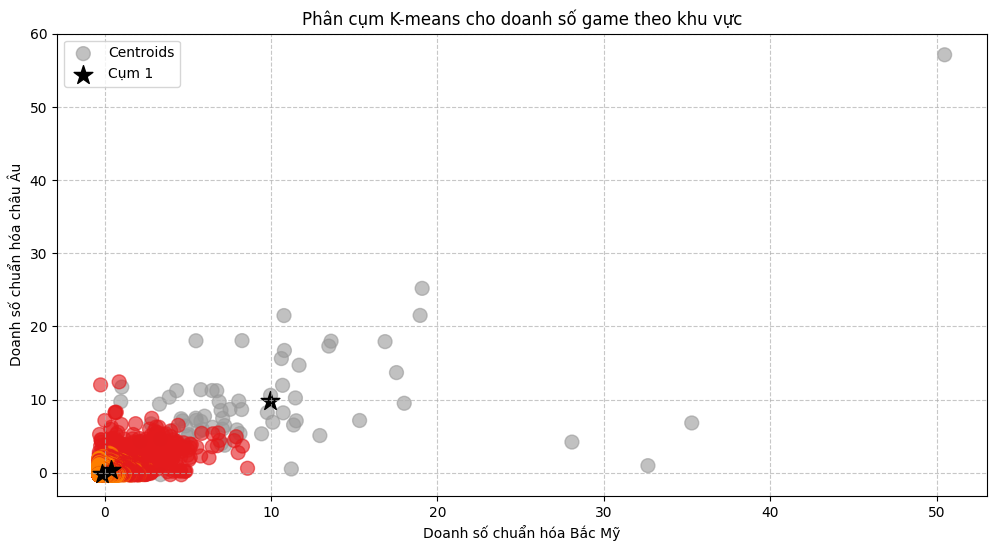

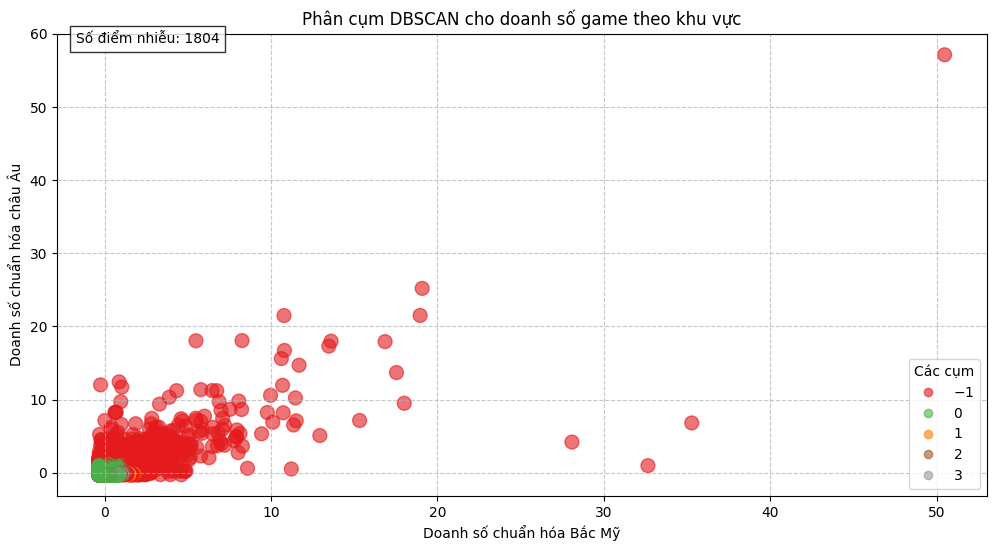


Thông tin về các cụm:
Cụm 0: 3736 games
Cụm 1: 12795 games
Cụm 2: 67 games

Thông tin về phân cụm DBSCAN:
Điểm nhiễu: 1804 games
Cụm 0: 14674 games
Cụm 1: 10 games
Cụm 2: 19 games
Cụm 3: 91 games


In [41]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-means clustering với số cụm phù hợp hơn
kmeans = KMeans(n_clusters=3, random_state=42)  # Giảm số cụm xuống 3
clusters = kmeans.fit_predict(X_scaled)

# Visualize K-means clusters với nhiều cải tiến
plt.figure(figsize=(12, 6))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], 
                     c=clusters, 
                     cmap='Set1',  # Đổi màu để dễ phân biệt hơn
                     alpha=0.6,     # Thêm độ trong suốt
                     s=100)        # Tăng kích thước điểm

# Thêm centers của các cụm
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], 
           c='black', 
           s=200, 
           marker='*', 
           label='Centroids')

plt.title('Phân cụm K-means cho doanh số game theo khu vực', fontsize=12)
plt.xlabel('Doanh số chuẩn hóa Bắc Mỹ', fontsize=10)
plt.ylabel('Doanh số chuẩn hóa châu Âu', fontsize=10)
plt.legend(*scatter.legend_elements(), title="Các cụm")
plt.legend(['Centroids', 'Cụm 1', 'Cụm 2', 'Cụm 3'])
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# DBSCAN clustering với tham số phù hợp hơn
dbscan = DBSCAN(eps=0.3, min_samples=10)  # Điều chỉnh tham số
clusters_dbscan = dbscan.fit_predict(X_scaled)

# Visualize DBSCAN clusters
plt.figure(figsize=(12, 6))
scatter = plt.scatter(X_scaled[:, 0], X_scaled[:, 1], 
                     c=clusters_dbscan, 
                     cmap='Set1',
                     alpha=0.6,
                     s=100)

plt.title('Phân cụm DBSCAN cho doanh số game theo khu vực', fontsize=12)
plt.xlabel('Doanh số chuẩn hóa Bắc Mỹ', fontsize=10)
plt.ylabel('Doanh số chuẩn hóa châu Âu', fontsize=10)
plt.legend(*scatter.legend_elements(), title="Các cụm")
plt.grid(True, linestyle='--', alpha=0.7)

# Thêm chú thích về noise points
noise_points = (clusters_dbscan == -1).sum()
plt.text(0.02, 0.98, f'Số điểm nhiễu: {noise_points}', 
         transform=plt.gca().transAxes, 
         bbox=dict(facecolor='white', alpha=0.8))

plt.show()

# In thông tin về các cụm
print("\nThông tin về các cụm:")
for cluster in range(max(clusters) + 1):
    cluster_size = (clusters == cluster).sum()
    print(f"Cụm {cluster}: {cluster_size} games")

print("\nThông tin về phân cụm DBSCAN:")
unique_labels = np.unique(clusters_dbscan)
for label in unique_labels:
    if label == -1:
        print(f"Điểm nhiễu: {(clusters_dbscan == label).sum()} games")
    else:
        print(f"Cụm {label}: {(clusters_dbscan == label).sum()} games")

### 3.3 Đánh giá kết quả

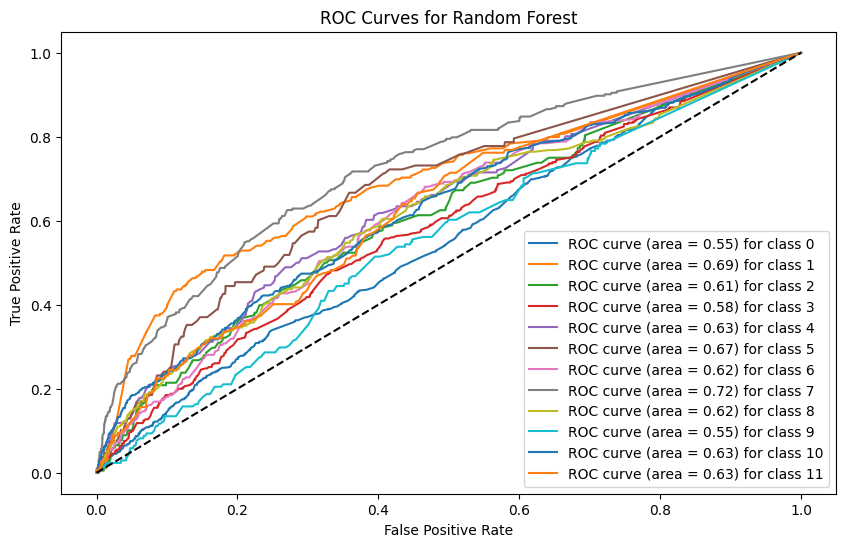


Silhouette Score cho K-means: 0.7739764541000345
Silhouette Score cho DBSCAN: 0.8103865573171393


In [36]:
# Đánh giá phân lớp
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# ROC Curve cho Random Forest
y_bin = label_binarize(y, classes=np.unique(y))
y_test_bin = label_binarize(y_test, classes=np.unique(y))
y_score = rf_model.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y))):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure(figsize=(10, 6))
for i in range(len(np.unique(y))):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve (area = {roc_auc[i]:.2f}) for class {i}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Random Forest')
plt.legend(loc="lower right")
plt.show()

# Đánh giá phân cụm
from sklearn.metrics import silhouette_score

print("\nSilhouette Score cho K-means:", silhouette_score(X_scaled, clusters))
print("Silhouette Score cho DBSCAN:", silhouette_score(X_scaled, clusters_dbscan))

## Phần 4: Mô hình học máy nâng cao
### 4.1 Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

# Chuẩn bị dữ liệu
X = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Year']]
le = LabelEncoder()
y = le.fit_transform(df['Genre'])  # Dự đoán thể loại game

# Chia tập train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Huấn luyện Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Đánh giá mô hình
rf_pred = rf_model.predict(X_test)
print("Random Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, rf_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, rf_pred))

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)

Random Forest Results:
Accuracy: 0.2232

Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.38      0.33       664
           1       0.28      0.33      0.30       259
           2       0.11      0.08      0.09       168
           3       0.17      0.17      0.17       330
           4       0.12      0.12      0.12       186
           5       0.07      0.08      0.08       108
           6       0.14      0.10      0.12       260
           7       0.27      0.27      0.27       283
           8       0.22      0.19      0.20       263
           9       0.06      0.04      0.05       171
          10       0.28      0.27      0.28       481
          11       0.11      0.07      0.09       147

    accuracy                           0.22      3320
   macro avg       0.18      0.18      0.18      3320
weighted avg       0.21      0.22      0.22      3320


Feature Importance:
        feature  importance
5          Year    0

### 4.2 Gradient Boosting

In [38]:
from sklearn.ensemble import GradientBoostingClassifier

# Huấn luyện Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

# Đánh giá mô hình
gb_pred = gb_model.predict(X_test)
print("Gradient Boosting Results:")
print(f"Accuracy: {accuracy_score(y_test, gb_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, gb_pred))

Gradient Boosting Results:
Accuracy: 0.2714

Classification Report:
              precision    recall  f1-score   support

           0       0.28      0.63      0.39       664
           1       0.36      0.33      0.34       259
           2       0.15      0.02      0.04       168
           3       0.20      0.17      0.18       330
           4       0.36      0.08      0.12       186
           5       0.17      0.03      0.05       108
           6       0.15      0.05      0.07       260
           7       0.34      0.34      0.34       283
           8       0.27      0.07      0.11       263
           9       0.06      0.01      0.01       171
          10       0.25      0.35      0.30       481
          11       0.20      0.15      0.17       147

    accuracy                           0.27      3320
   macro avg       0.23      0.19      0.18      3320
weighted avg       0.25      0.27      0.23      3320



### 4.3 Neural Network với Keras

Epoch 1/50
332/332 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1898 - loss: 2.3824 - val_accuracy: 0.2146 - val_loss: 2.2943
Epoch 2/50
332/332 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2247 - loss: 2.2713 - val_accuracy: 0.2255 - val_loss: 2.2705
Epoch 3/50
332/332 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2224 - loss: 2.2550 - val_accuracy: 0.2270 - val_loss: 2.2592
Epoch 4/50
332/332 ━━━━━━━━━━━━━━━━━━━━ 0s 903us/step - accuracy: 0.2331 - loss: 2.2240 - val_accuracy: 0.2225 - val_loss: 2.2527
Epoch 5/50
332/332 ━━━━━━━━━━━━━━━━━━━━ 0s 925us/step - accuracy: 0.2320 - loss: 2.2248 - val_accuracy: 0.2410 - val_loss: 2.2410
Epoch 6/50
332/332 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - accuracy: 0.2482 - loss: 2.2028 - val_accuracy: 0.2459 - val_loss: 2.2384
Epoch 7/50
332/332 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - accuracy: 0.2480 - loss: 2.1885 - val_accuracy: 0.2444 - val_loss: 2.2279
Epoch 8/50
332/332 ━━━━━━━━━━━━━━━━━━━━ 0s 910us/step - accuracy: 0.2519 - loss: 2.1930 - val_ac

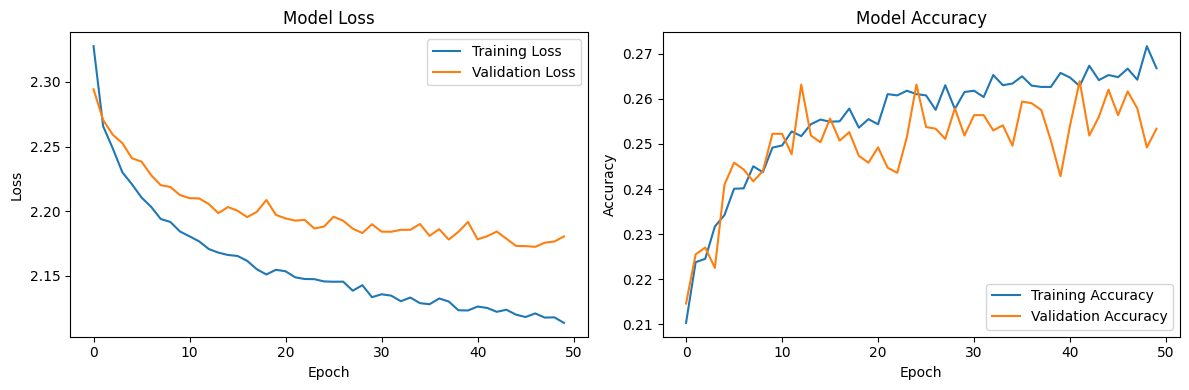

In [39]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# One-hot encoding cho biến mục tiêu
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Xây dựng mô hình Neural Network
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(len(np.unique(y)), activation='softmax')
])

# Compile mô hình
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Huấn luyện mô hình
history = model.fit(X_train_scaled, y_train_cat,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)

# Đánh giá mô hình
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_cat, verbose=0)
print(f"\nNeural Network Test Accuracy: {test_accuracy:.4f}")

# Vẽ đồ thị quá trình học
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

### 4.4 Word Embedding cho tên game

Epoch 1/10
415/415 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2523 - loss: 2.3435 - val_accuracy: 0.2479 - val_loss: 2.2735
Epoch 2/10
415/415 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4237 - loss: 1.8014 - val_accuracy: 0.3602 - val_loss: 2.0011
Epoch 3/10
415/415 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6391 - loss: 1.2861 - val_accuracy: 0.4193 - val_loss: 1.8025
Epoch 4/10
415/415 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7456 - loss: 0.9343 - val_accuracy: 0.4605 - val_loss: 1.6741
Epoch 5/10
415/415 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8072 - loss: 0.7327 - val_accuracy: 0.5033 - val_loss: 1.6373
Epoch 6/10
415/415 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8476 - loss: 0.6014 - val_accuracy: 0.5223 - val_loss: 1.6250
Epoch 7/10
415/415 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8654 - loss: 0.5164 - val_accuracy: 0.5539 - val_loss: 1.6153
Epoch 8/10
415/415 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8837 - loss: 0.4397 - val_accuracy: 0.

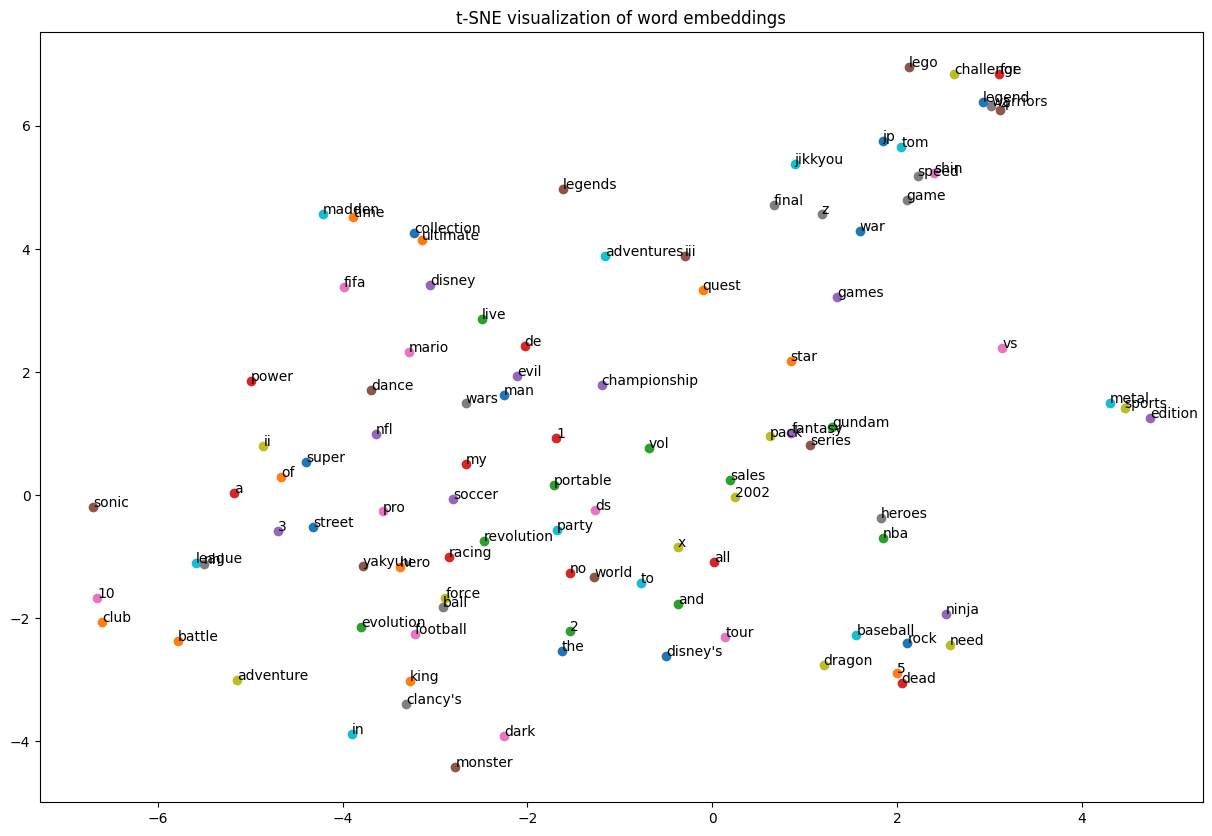

In [40]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Chuẩn bị dữ liệu text
game_names = df['Name'].values
max_words = 5000
max_len = 10

# Tokenize tên game
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(game_names)
sequences = tokenizer.texts_to_sequences(game_names)
word_index = tokenizer.word_index

# Padding sequences
padded_sequences = pad_sequences(sequences, maxlen=max_len)

# Tạo mô hình embedding
embedding_dim = 50

model_embedding = Sequential([
    tf.keras.layers.Embedding(max_words, embedding_dim, input_length=max_len),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(16, activation='relu'),
    Dense(len(np.unique(y)), activation='softmax')
])

model_embedding.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

# Huấn luyện mô hình
history_embedding = model_embedding.fit(padded_sequences, 
                                      to_categorical(y),
                                      epochs=10,
                                      batch_size=32,
                                      validation_split=0.2)

# Visualize embeddings
embeddings = model_embedding.layers[0].get_weights()[0]
words = list(word_index.keys())[:100]  # Lấy 100 từ đầu tiên

# Giảm chiều với t-SNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
embeddings_2d = tsne.fit_transform(embeddings[:100])

# Vẽ biểu đồ embedding
plt.figure(figsize=(15, 10))
for i, word in enumerate(words):
    plt.scatter(embeddings_2d[i, 0], embeddings_2d[i, 1])
    plt.annotate(word, (embeddings_2d[i, 0], embeddings_2d[i, 1]))
plt.title('t-SNE visualization of word embeddings')
plt.show()